<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo2/blob/main/Notebooks/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória da base de cobertura vacinal do SUS
Utilizando as informações do [TabNet do DataSUS]("http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def") vou fazer uma análise exploratória dos dados, conferindo a cobertura vacinal levando em conta as informações de referência encontradas na página 6 do relatório do PNI [*Coberturas vacinais no Brasil Período: 2010 - 2014*](https://portalarquivos2.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf).

Irei avaliar o período de 2014 até 2018, por serem anos em que os dados estão num padrão mais comparável, com abertura por estados e tipo de Imuno. Buscando avaliar quais estados estão mais bem cobertos quais tipos de Imuno tem uma cobertura maior ou menor no Brasil.

### Carregando os dados e importando bibliotecas
Está etapa foi realizada em um outro notebook, aqui iremos apenas carregar ele e roda-lo para irmos direto para as análises. Se quiser entender melhor como essa etapa foi realizada entre neste [link]("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo2/blob/main/Notebooks/capturaDados.ipynb").

In [1]:
!git clone "https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo2" #clona o github para utilizarmos os arquivos

Cloning into 'BootcampAlura_ProjetoModulo2'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 102 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (102/102), 59.81 KiB | 7.48 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
%run BootcampAlura_ProjetoModulo2/Notebooks/capturaDados.ipynb #roda o arquivo de captura de dados

BootcampAlura_ProjetoModulo2/Notebooks/capturaDados.ipynb:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  "cell_type": "markdown",


,uf,Imuno,ano,cv,sigla,regiao,meta,atingimento,qualiAtingimento
0,Acre,BCG,1994,61.01,AC,Norte,90,0.68,Abaixo da Meta
1,Acre,Hepatite B em crianças até 30 dias,1994,0.00,AC,Norte,95,0.00,Muito Abaixo
2,Acre,Rotavírus Humano,1994,0.00,AC,Norte,90,0.00,Muito Abaixo
3,Acre,Meningococo C,1994,0.00,AC,Norte,95,0.00,Muito Abaixo
4,Acre,Hepatite B,1994,11.21,AC,Norte,95,0.12,Muito Abaixo


### Lista de Imunos e de UFs que fazem parte da análise

In [3]:
#@title
Imunos = dados["Imuno"].drop_duplicates() # lista imunos
UFs = dados["uf"].drop_duplicates() # lista UFs
print(f"Imunos ({Imunos.count()} itens): {Imunos.sort_values().values}")
print(f"\n Unidades da Federação ({UFs.count()} itens): {UFs.values}")

Imunos (13 itens): ['BCG' 'DTP' 'Febre Amarela' 'Hepatite A' 'Hepatite B' 'Meningococo C'
 'Penta' 'Pneumocócica' 'Poliomielite' 'Rotavírus Humano'
 'Tetra Viral(SRC+VZ)' 'Tríplice Viral  D1' 'Tríplice Viral  D2']

 Unidades da Federação (27 itens): ['Acre' 'Alagoas' 'Amapá' 'Amazonas' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Mato Grosso' 'Mato Grosso do Sul'
 'Minas Gerais' 'Pará' 'Paraíba' 'Paraná' 'Pernambuco' 'Piauí'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rio Grande do Sul' 'Rondônia'
 'Roraima' 'Santa Catarina' 'São Paulo' 'Sergipe' 'Tocantins']


### Analises de frequencia
As classificações de Atingimento são:
* **Meta Atingida**: Cobertura Vacinal maior ou igual a meta do PNI
* **Abaixo da Meta**: Cobertura Vacinal até 50% abaixo da meta
* **Muito Abaixo**: Cobertura Vacinal que não atingiu nem 50% da meta

In [4]:
# observando a frequencia em percentual de ufs por imuno e atingimento da meta
frequencia = pd.crosstab(index=[dados["Imuno"]],columns=[dados["qualiAtingimento"],dados["ano"]])/UFs.count()*100
print("Percentual de UFs por Imuno e atingimento da meta\n")
frequencia

Percentual de UFs por Imuno e atingimento da meta



qualiAtingimento     Meta Atingida                    ... Muito Abaixo                  
ano                           2014  2015  2016  2017  ...         2015  2016  2017  2018
Imuno                                                 ...                               
BCG                         100.00 92.59 81.48 85.19  ...         0.00  0.00  0.00  0.00
DTP                          14.81 33.33 11.11  3.70  ...         0.00  0.00  0.00  0.00
Febre Amarela                11.11  7.41  7.41  3.70  ...        37.04 37.04 33.33 25.93
Hepatite A                    0.00 55.56  3.70  3.70  ...         0.00  0.00  0.00  0.00
Hepatite B                   40.74 59.26 70.37 11.11  ...         0.00  0.00  0.00  0.00
Meningococo C                51.85 62.96 37.04 11.11  ...         0.00  0.00  0.00  0.00
Penta                        37.04 48.15 25.93  7.41  ...         0.00  0.00  0.00  0.00
Pneumocócica                 37.04 37.04 51.85 25.93  ...         0.00  0.00  0.00  0.00
Poliomielite                 59.26 70.37 11.11  7.41  ...         0.00  0.00  0.00  0.00
Rotavírus Humano             62.96 70.37 51.85 22.22  ...         0.00  0.00  0.00  0.00
Tetra Viral(SRC+VZ)          25.93  0.00  7.41  0.00  ...         3.70  0.00 48.15 51.85
Tríplice Viral  D1           92.59 51.85 51.85 22.22  ...         0.00  0.00  0.00  0.00
Tríplice Viral  D2           29.63  0.00  7.41  0.00  ...         3.70  0.00  0.00  0.00

[13 rows x 15 columns]

#### Avaliando a tabela do percentual de UFs que atingem a meta de cobertura vacinal por Imuno
É possível verificar que de maneira geral a cobertura vacinal tem caído com o passar dos anos (tabela abaixo), algo que já haiva sido identificado nessa análise da FioCruz ["*A queda da imunização no Brasil*"](https://portal.fiocruz.br/sites/portal.fiocruz.br/files/documentos/revistaconsensus_25_a_queda_da_imunizacao.pdf) que fez uma avalição de 2012 até 2016. 

No corte desta avaliação, num coneito um pouco diferente, não vejo sinais de melhora analisando o % de estados que atigiram a meta de vacinação. No caso da Tetra Viral vemos a principal piora de cenário.

A Hepatite A me chamou anteção por ter um pico de cumprimento da meta em 2015 e investigando um pouco melhor descobri que ela entrou no programa de vacinação em 2014 ([Hepatite A entra na lista de vacinas oferecidas pelo SUS](https://www.crf-rj.org.br/portal/noticias/526-hepatite-a-entra-na-lista-de-vacinas-oferecidas-pelo-sus.html)), seguindo o que um [relatório do CONITEC](http://conitec.gov.br/images/Incorporados/VacinaHepatite-final.pdf) recomendava em janeiro de 2013. Acredito pode ser efeito da campanha ter começado no meio de 2014 que acabou gerando resultado apenas dem 2015. O triste é que após isso tivemos uma queda grande nos anos seguinte.



In [5]:
# observando a frequencia em percentual de Insumos por UFs e atingimento da meta
frequencia = pd.crosstab(index=[dados["uf"]],columns=[dados["qualiAtingimento"],dados["ano"]])/Imunos.count()*100
print("Percentual de Imunos por UF e atingimento da meta\n")
frequencia

Percentual de Imunos por UF e atingimento da meta



qualiAtingimento     Meta Atingida                     ... Muito Abaixo                 
ano                           2014  2015   2016  2017  ...         2015 2016  2017  2018
uf                                                     ...                              
Acre                         15.38  7.69   7.69  7.69  ...         0.00 0.00  0.00  0.00
Alagoas                      15.38 38.46  23.08 15.38  ...         7.69 7.69 15.38 15.38
Amapá                        15.38  7.69  46.15  7.69  ...         0.00 0.00  0.00  0.00
Amazonas                     23.08 38.46  15.38  7.69  ...         0.00 0.00  0.00  0.00
Bahia                        15.38 15.38   0.00  0.00  ...         0.00 0.00  7.69  7.69
Ceará                        76.92 76.92  69.23 69.23  ...         7.69 7.69 15.38 15.38
Distrito Federal             46.15  0.00 100.00 23.08  ...         0.00 0.00  0.00  0.00
Espírito Santo               84.62 69.23  38.46  7.69  ...         7.69 7.69  7.69  7.69
Goiás                        38.46 38.46  15.38  7.69  ...         0.00 0.00  0.00  0.00
Maranhão                     15.38 23.08   7.69  7.69  ...         0.00 0.00  7.69  7.69
Mato Grosso                  92.31 76.92  53.85  7.69  ...         0.00 0.00  0.00  0.00
Mato Grosso do Sul           92.31 84.62  53.85 23.08  ...         0.00 0.00  0.00  0.00
Minas Gerais                 61.54 76.92  30.77  7.69  ...         0.00 0.00  7.69  7.69
Paraná                       61.54 76.92  30.77 15.38  ...         0.00 0.00  0.00  0.00
Paraíba                      30.77 30.77  23.08 15.38  ...         7.69 7.69 15.38 15.38
Pará                         15.38  7.69   0.00  0.00  ...        15.38 0.00  0.00  7.69
Pernambuco                   53.85 76.92  46.15 15.38  ...         7.69 7.69 15.38 15.38
Piauí                         7.69  0.00   0.00  7.69  ...         0.00 0.00  7.69  7.69
Rio Grande do Norte          23.08 23.08   7.69  0.00  ...         7.69 7.69 15.38 15.38
Rio Grande do Sul            46.15 30.77  15.38  7.69  ...         0.00 0.00  0.00  0.00
Rio de Janeiro               53.85 61.54  53.85 23.08  ...         7.69 7.69 15.38 15.38
Rondônia                     92.31 84.62  76.92 76.92  ...         0.00 0.00  0.00  0.00
Roraima                      15.38 61.54  23.08 15.38  ...         0.00 0.00  0.00  0.00
Santa Catarina               61.54 76.92  69.23 15.38  ...         7.69 7.69  7.69  0.00
Sergipe                      15.38 23.08   7.69  7.69  ...         7.69 7.69 15.38 15.38
São Paulo                    76.92 69.23  23.08 23.08  ...         7.69 7.69 15.38  7.69
Tocantins                    23.08 46.15  30.77  7.69  ...         0.00 0.00  0.00  0.00

[27 rows x 15 columns]

#### Avaliando a tabela do percentual de Imunos que atigiram a meta de cobertura vacinal por UFs
Analisando a tabela abaixo percebo a mesma queda, tirando Alagoas que vejo uma melhora e com isso será um dos estados que vou querer entender melhor a seguir.

Outras UFs que me chamaram atenção e irei explorar melhor serão:
* Ceará que ainda tem a melhor taxa entre todos os estados;
* Distrito Federal que possuí uma oscilação grande nos meses;
* Bahia por ser um dos piores, junto com outros como
* São Paulo por ser o estado que moro e quero entender melhor os seus baixo índices de atigimento da meta.


### Análise do estado do Alagoas

In [9]:
dadosAlagoas = dados.query("uf == 'Alagoas'").sort_values("Imuno")
frequencia = pd.crosstab(index=[dadosAlagoas["Imuno"],dadosAlagoas["meta"]],columns=[dadosAlagoas["ano"]], 
                         values=dadosAlagoas["cv"], aggfunc="mean")
print("Cobertura vacinal do estado do Alagoas\n")
frequencia

Cobertura vacinal do estado do Alagoas



,ano,2014,2015,2016,2017,2018
Imuno,meta,,,,,
BCG,90,100.00,100.00,100.00,100.00,100.00
DTP,100,90.43,91.59,84.81,81.22,97.46
Febre Amarela,100,0.40,0.51,0.50,0.80,2.94
Hepatite A,95,52.93,98.05,72.88,91.58,88.28
Hepatite B,95,91.65,92.53,98.57,82.62,100.00
Meningococo C,95,93.75,95.30,89.65,88.92,99.70
Penta,95,90.23,91.40,84.74,81.06,97.11
Pneumocócica,95,87.82,88.29,94.37,91.68,100.00
Poliomielite,95,93.32,94.25,80.07,82.65,94.80


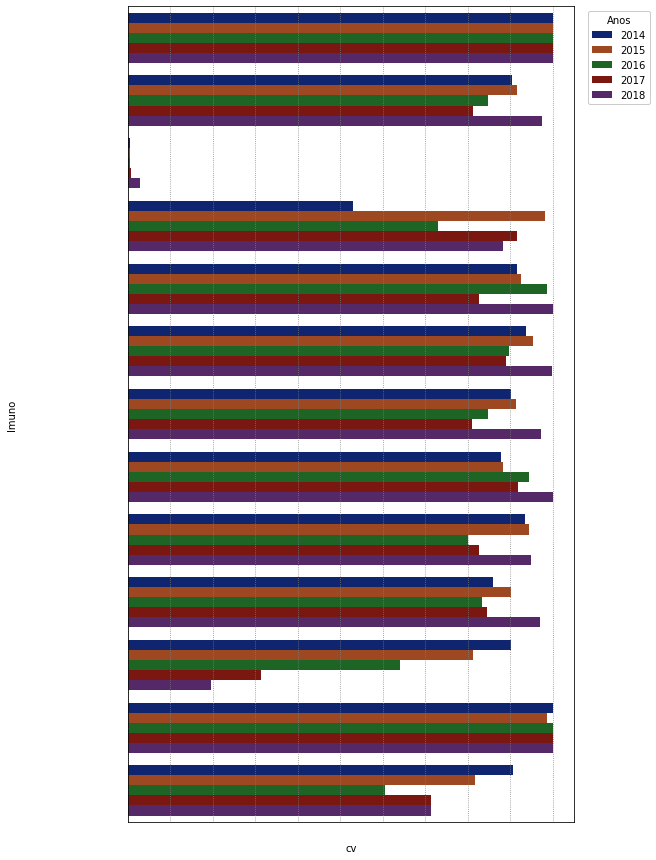

In [7]:
plotar(dadosAlagoas)

#### Avaliando a tabela e o gráfico acima
Conseguimos ver que realmente o estado do Alagoas está muito bem na cobertura de vacinação de quase todos os imunos, demonstrando uma preocupação da população local com a vacinação diferente do resto do Brasil.

O que me chamou atenção foi a vacina de Febre Amarela que destoa no gráfico, pesquisando encontrei essa [reportagem]("https://g1.globo.com/al/alagoas/noticia/ministerio-da-saude-recomenda-que-alagoanos-tomem-a-vacina-da-febre-amarela-a-partir-de-2019.ghtml") dizendo que só passou a ser recomendada a vacina no estado como um todo a partir de 2019.

A única atenção no meu ponto de vista é com relação a Trera Viral e Tríplice Viral D2 que estão com uma cobertura baixa, parecendo que dão a D1 para a criança, mas acabam não tomando os doses sequenciais para realmente proteger as crianças contra sarampo, a caxumba e a rubéola. Valeria uma análise mais detalhada depois.

### Análise do estado do Ceará

In [10]:
dadosCeara = dados.query("uf == 'Ceará'").sort_values("Imuno")
frequencia = pd.crosstab(index=[dadosCeara["Imuno"],dadosCeara["meta"]],columns=[dadosCeara["ano"]], 
                         values=dadosCeara["cv"], aggfunc="mean")
print("Cobertura vacinal do estado do Ceará\n")
frequencia

Cobertura vacinal do estado do Ceará



,ano,2014,2015,2016,2017,2018
Imuno,meta,,,,,
BCG,90,100.00,100.00,100.00,100.00,100.00
DTP,100,99.22,100.00,100.00,96.15,100.00
Febre Amarela,100,0.23,0.36,0.44,0.57,0.90
Hepatite A,95,57.84,100.00,94.11,96.40,92.85
Hepatite B,95,99.59,100.00,100.00,98.66,100.00
Meningococo C,95,99.66,100.00,100.00,100.00,100.00
Penta,95,98.92,100.00,100.00,96.01,100.00
Pneumocócica,95,98.37,100.00,100.00,100.00,100.00
Poliomielite,95,100.00,100.00,100.00,96.57,100.00


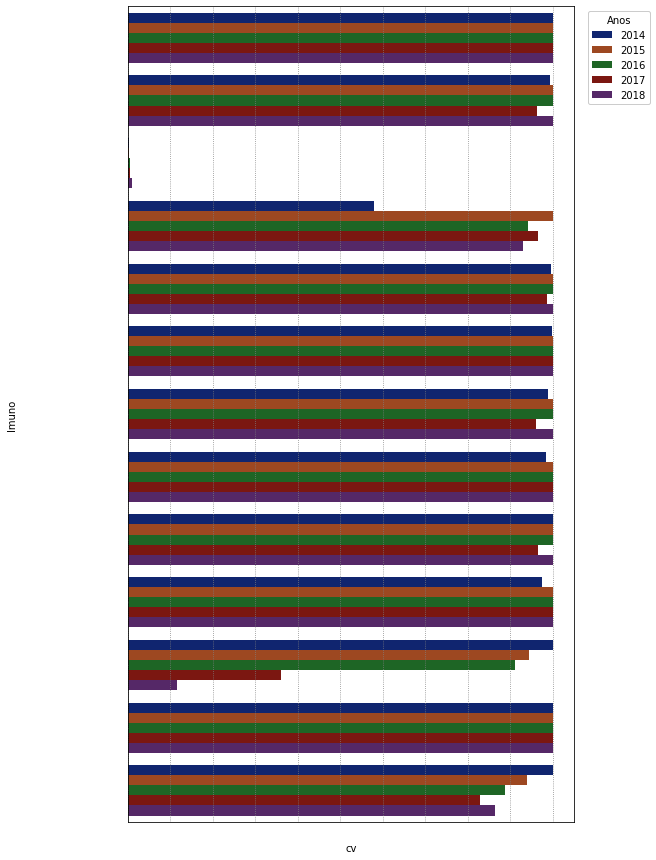

In [11]:
plotar(dadosCeara)

#### Avaliando a tabela e o gráfico acima
O Ceará é outro estado diferenciado, vemos uma cobertura de vacinação até melhor do que a do Alagoas, sendo um grande destaque com certeza.

Assim como no Alagoas, o Ceará não tinha a vacina de febre amarela no calenário. Conforme está [reportagem do Diário do Nordeste]("https://diariodonordeste.verdesmares.com.br/metro/vacina-contra-febre-amarela-entra-no-calendario-de-rotina-para-toda-a-populacao-do-ceara-em-setembro-1.3128460"), ela só entrou no calendário de vacinação agora em 2021.

E também, parecido com o Alagoas, a Trera Viral está com a cobertura bem baixa, a Trílice Viral D2 está um pouco abaixo, mas não tanto. Valeria uma análise posterior com atenção principalmente a Varicela que é coberta apenas pela Tetra Viral.